Import delle librerie necessarie

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# **ANALISI ESAPLORATIVA**

In [3]:
path = '../Data/final_data/abruzzo.csv'
df = pd.read_csv(path)

df.Date = pd.to_datetime(df.Date)

df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month

display(df)

,Region,Infrastructure,ResidenceCountry,Date,Arrivals,Attendance,Year,Month
0,Abruzzo,HOTELLIKE,Italia,2008-01-01,1205426.0,4479655.0,2008,1
1,Abruzzo,HOTELLIKE,Paesi esteri,2008-01-01,149736.0,643212.0,2008,1
2,Abruzzo,OTHER,Italia,2008-01-01,228036.0,2060178.0,2008,1
3,Abruzzo,OTHER,Paesi esteri,2008-01-01,43151.0,377431.0,2008,1
4,Chieti,HOTELLIKE,Italia,2008-01-01,225852.0,703217.0,2008,1
...,...,...,...,...,...,...,...,...
3635,Pescara,OTHER,Paesi esteri,2021-12-01,145.0,409.0,2021,12
3636,Teramo,HOTELLIKE,Italia,2021-12-01,7582.0,19674.0,2021,12
3637,Teramo,HOTELLIKE,Paesi esteri,2021-12-01,410.0,1761.0,2021,12
3638,Teramo,OTHER,Italia,2021-12-01,1333.0,4437.0,2021,12


In [4]:
def make_mask(df:pd.DataFrame, region:str, infrastructure:str, residence:str):
    df = df[(df['Region'] == region) & (df['Infrastructure'] == infrastructure) & (df['ResidenceCountry']==residence)]
    return df

In [5]:
mask_abr_hotel_ita = make_mask(df, 'Abruzzo', 'HOTELLIKE', 'Italia')
mask_abr_hotel_ext = make_mask(df, 'Abruzzo', 'HOTELLIKE', 'Paesi esteri')
mask_abr_nothotel_ita = make_mask(df, 'Abruzzo', 'OTHER', 'Italia')
mask_abr_nothotel_ext = make_mask(df, 'Abruzzo', 'OTHER', 'Paesi esteri')

mask_ter_hotel_ita = make_mask(df, 'Teramo', 'HOTELLIKE', 'Italia')
mask_ter_hotel_ext = make_mask(df, 'Teramo', 'HOTELLIKE', 'Paesi esteri')
mask_ter_nothotel_ita = make_mask(df, 'Teramo', 'OTHER', 'Italia')
mask_ter_nothotel_ext = make_mask(df, 'Teramo', 'OTHER', 'Paesi esteri')

mask_chi_hotel_ita = make_mask(df, 'Chieti', 'HOTELLIKE', 'Italia')
mask_chi_hotel_ext = make_mask(df, 'Chieti', 'HOTELLIKE', 'Paesi esteri')
mask_chi_nothotel_ita = make_mask(df, 'Chieti', 'OTHER', 'Italia')
mask_chi_nothotel_ext = make_mask(df, 'Chieti', 'OTHER', 'Paesi esteri')

mask_pes_hotel_ita = make_mask(df, 'Pescara', 'HOTELLIKE', 'Italia')
mask_pes_hotel_ext = make_mask(df, 'Pescara', 'HOTELLIKE', 'Paesi esteri')
mask_pes_nothotel_ita = make_mask(df, 'Pescara', 'OTHER', 'Italia')
mask_pes_nothotel_ext = make_mask(df, 'Pescara', 'OTHER', 'Paesi esteri')

mask_laq_hotel_ita = make_mask(df, "L'Aquila", 'HOTELLIKE', 'Italia')
mask_laq_hotel_ext = make_mask(df, "L'Aquila", 'HOTELLIKE', 'Paesi esteri')
mask_laq_nothotel_ita = make_mask(df, "L'Aquila", 'OTHER', 'Italia')
mask_laq_nothotel_ext = make_mask(df, "L'Aquila", 'OTHER', 'Paesi esteri')

In [93]:
# Classe per creare grafici a dispersione e tracciato
class Plot:
  def __init__(self, sizex:int, sizey:int):
    self.x = np.zeros(sizex)
    self.y = np.zeros(sizey)

  #label nome associato alla legenda dei dati che verranno rappresentati
  def tracciato(self, x:np.array, y:np.array, label:str, colore:str):
    self.x = x
    self.y = y
    plt.plot(self.x, self.y, label=label, color=colore)

  def dispersione(self, x:np.array, y:np.array, label:str,
                  colore:str, dimensione:np.int64, trasparenza: np.float64):
    self.x = x
    self.y = y
    plt.scatter(self.x, self.y, label=label, color=colore,
                s=dimensione, alpha=trasparenza)

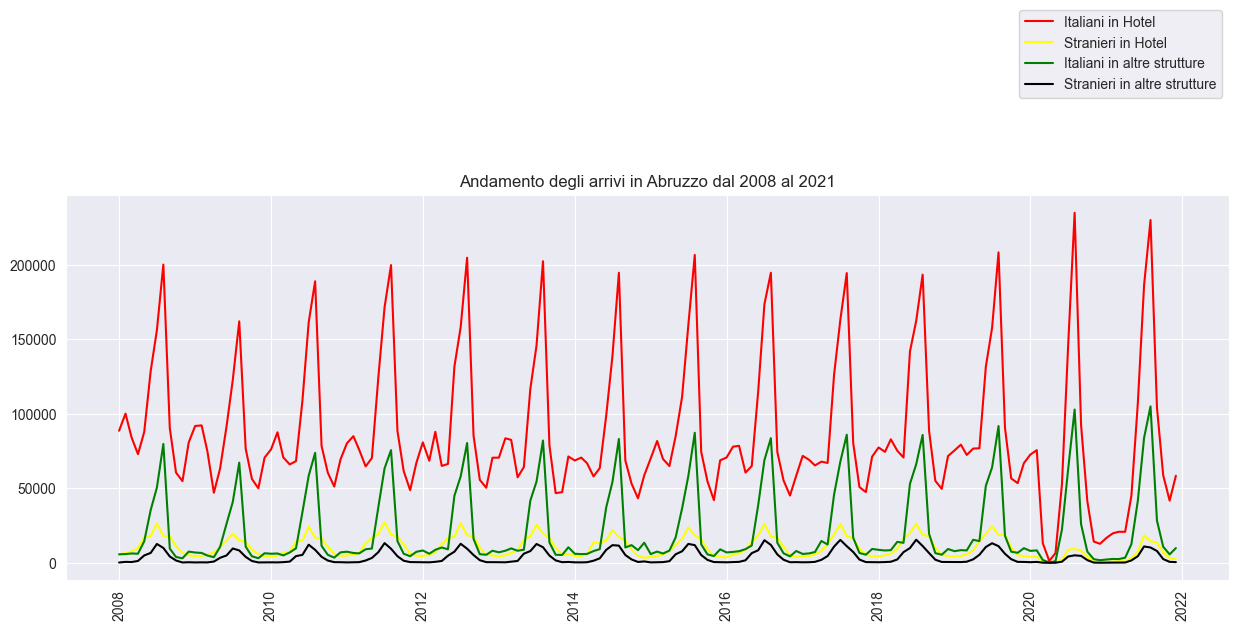

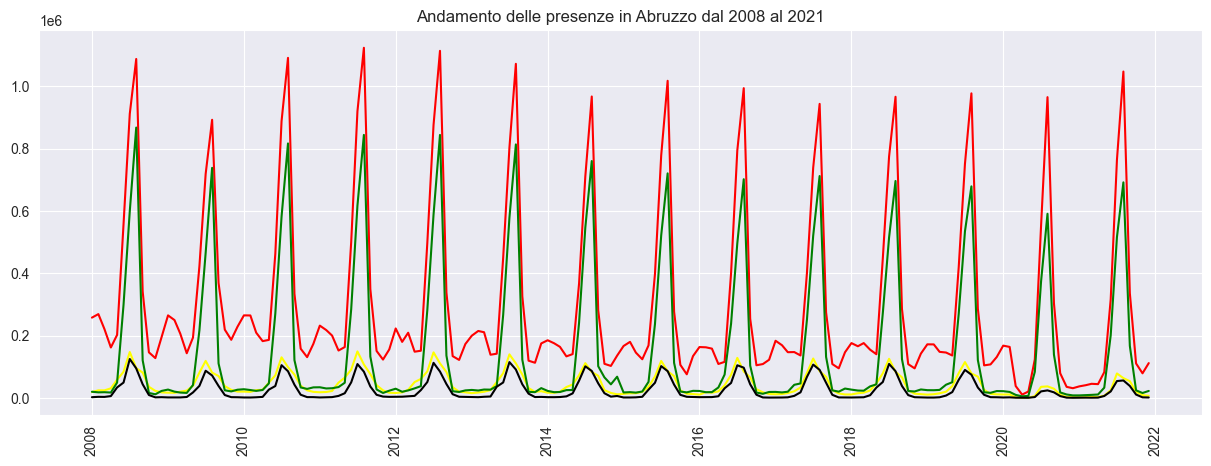

In [94]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
arrivals_abruzzo = Plot(mask_abr_hotel_ita.Date.size, mask_abr_hotel_ita['Arrivals'].size)
arrivals_abruzzo.tracciato(mask_abr_hotel_ita.Date, mask_abr_hotel_ita['Arrivals'], "Italiani in Hotel", "red")
arrivals_abruzzo.tracciato(mask_abr_hotel_ita.Date, mask_abr_hotel_ext['Arrivals'], "Stranieri in Hotel", "yellow")
arrivals_abruzzo.tracciato(mask_abr_hotel_ita.Date, mask_abr_nothotel_ita['Arrivals'], "Italiani in altre strutture", "green")
arrivals_abruzzo.tracciato(mask_abr_hotel_ita.Date, mask_abr_nothotel_ext['Arrivals'], "Stranieri in altre strutture", "black")
plt.title("Andamento degli arrivi in Abruzzo dal 2008 al 2021")
plt.legend(bbox_to_anchor=(1, 1.50))
plt.show()

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
attendance_abruzzo = Plot(mask_abr_hotel_ita.Date.size, mask_abr_hotel_ita['Attendance'].size)
attendance_abruzzo.tracciato(mask_abr_hotel_ita.Date, mask_abr_hotel_ita['Attendance'], "Italiani in Hotel", "red")
attendance_abruzzo.tracciato(mask_abr_hotel_ita.Date, mask_abr_hotel_ext['Attendance'], "Stranieri in Hotel", "yellow")
attendance_abruzzo.tracciato(mask_abr_hotel_ita.Date, mask_abr_nothotel_ita['Attendance'], "Italiani in altre strutture", "green")
attendance_abruzzo.tracciato(mask_abr_hotel_ita.Date, mask_abr_nothotel_ext['Attendance'], "Stranieri in altre strutture", "black")
plt.title("Andamento delle presenze in Abruzzo dal 2008 al 2021")
plt.show()

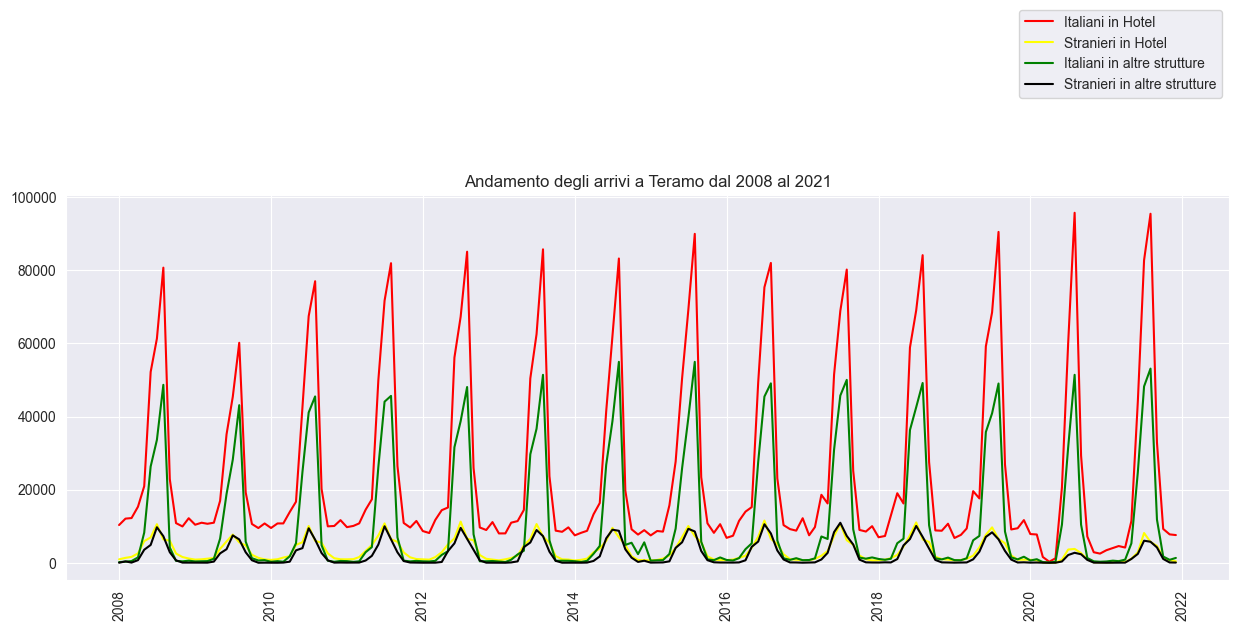

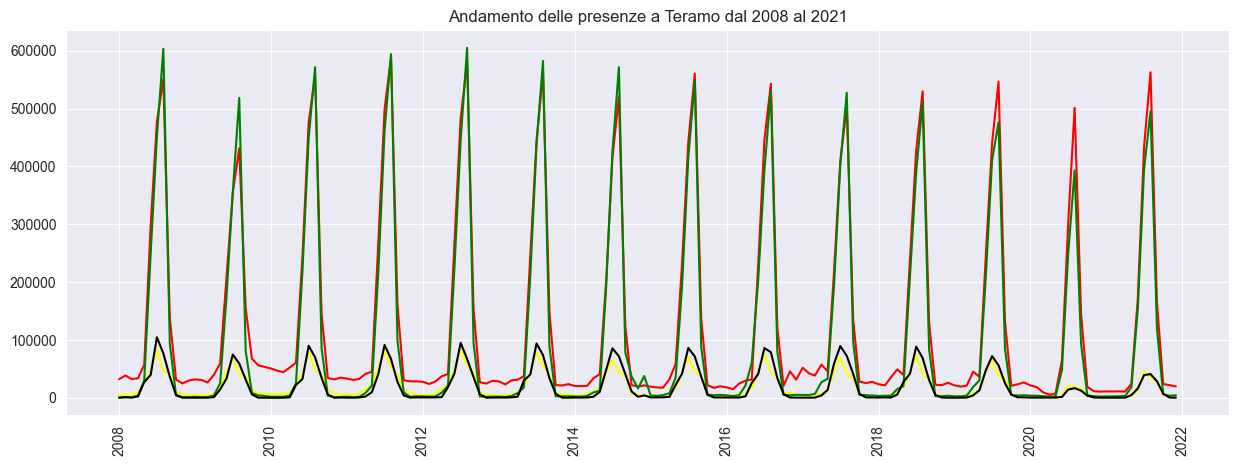

In [95]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
arrivals_teramo = Plot(mask_ter_hotel_ita.Date.size, mask_ter_hotel_ita['Arrivals'].size)
arrivals_teramo.tracciato(mask_ter_hotel_ita.Date, mask_ter_hotel_ita['Arrivals'], "Italiani in Hotel", "red")
arrivals_teramo.tracciato(mask_ter_hotel_ita.Date, mask_ter_hotel_ext['Arrivals'], "Stranieri in Hotel", "yellow")
arrivals_teramo.tracciato(mask_ter_hotel_ita.Date, mask_ter_nothotel_ita['Arrivals'], "Italiani in altre strutture", "green")
arrivals_teramo.tracciato(mask_ter_hotel_ita.Date, mask_ter_nothotel_ext['Arrivals'], "Stranieri in altre strutture", "black")
plt.title("Andamento degli arrivi a Teramo dal 2008 al 2021")
plt.legend(bbox_to_anchor=(1, 1.50))
plt.show()

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
attendance_teramo = Plot(mask_ter_hotel_ita.Date.size, mask_ter_hotel_ita['Attendance'].size)
attendance_teramo.tracciato(mask_ter_hotel_ita.Date, mask_ter_hotel_ita['Attendance'], "Italiani in Hotel", "red")
attendance_teramo.tracciato(mask_ter_hotel_ita.Date, mask_ter_hotel_ext['Attendance'], "Stranieri in Hotel", "yellow")
attendance_teramo.tracciato(mask_ter_hotel_ita.Date, mask_ter_nothotel_ita['Attendance'], "Italiani in altre strutture", "green")
attendance_teramo.tracciato(mask_ter_hotel_ita.Date, mask_ter_nothotel_ext['Attendance'], "Stranieri in altre strutture", "black")
plt.title("Andamento delle presenze a Teramo dal 2008 al 2021")
plt.show()

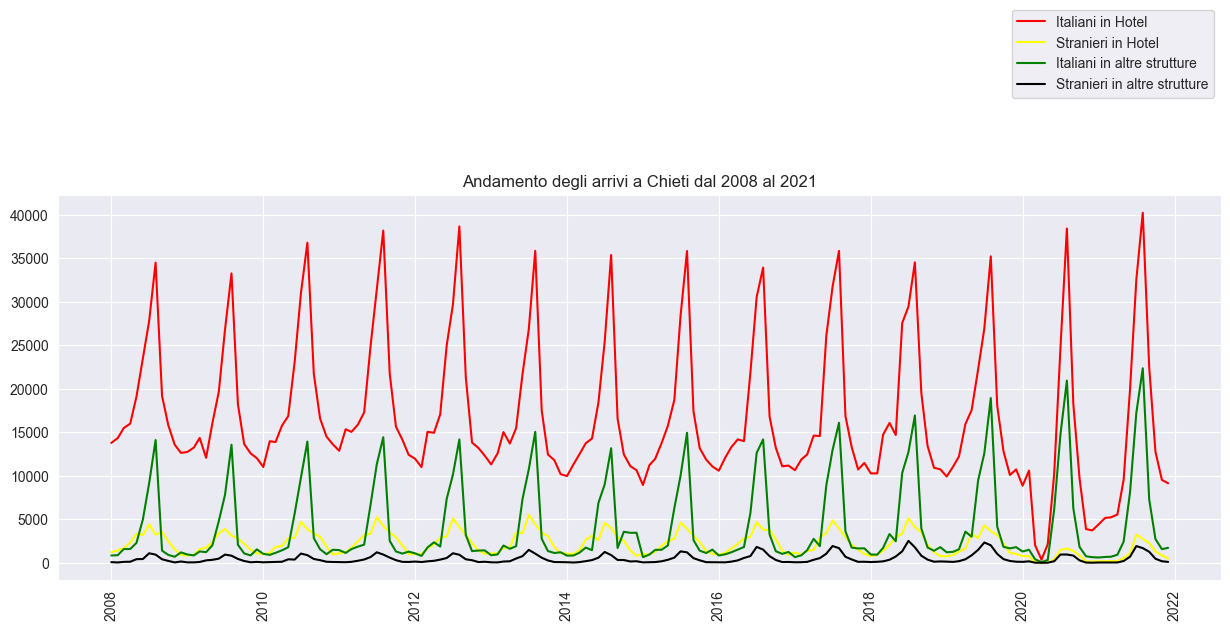

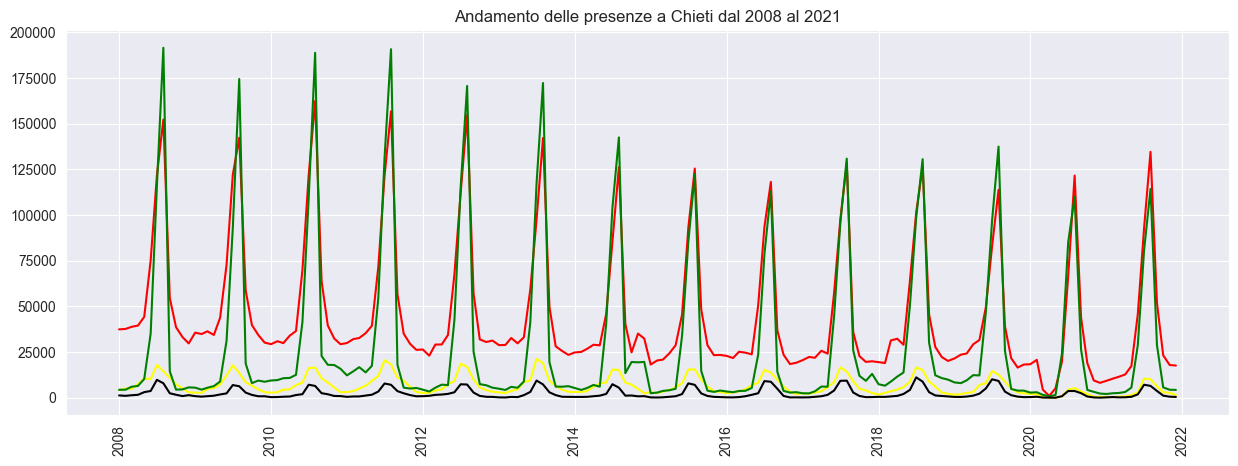

In [96]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
arrivals_chieti = Plot(mask_chi_hotel_ita.Date.size, mask_chi_hotel_ita['Arrivals'].size)
arrivals_chieti.tracciato(mask_chi_hotel_ita.Date, mask_chi_hotel_ita['Arrivals'], "Italiani in Hotel", "red")
arrivals_chieti.tracciato(mask_chi_hotel_ita.Date, mask_chi_hotel_ext['Arrivals'], "Stranieri in Hotel", "yellow")
arrivals_chieti.tracciato(mask_chi_hotel_ita.Date, mask_chi_nothotel_ita['Arrivals'], "Italiani in altre strutture", "green")
arrivals_chieti.tracciato(mask_chi_hotel_ita.Date, mask_chi_nothotel_ext['Arrivals'], "Stranieri in altre strutture", "black")
plt.title("Andamento degli arrivi a Chieti dal 2008 al 2021")
plt.legend(bbox_to_anchor=(1, 1.50))
plt.show()

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
attendance_chieti = Plot(mask_chi_hotel_ita.Date.size, mask_chi_hotel_ita['Attendance'].size)
attendance_chieti.tracciato(mask_chi_hotel_ita.Date, mask_chi_hotel_ita['Attendance'], "Italiani in Hotel", "red")
attendance_chieti.tracciato(mask_chi_hotel_ita.Date, mask_chi_hotel_ext['Attendance'], "Stranieri in Hotel", "yellow")
attendance_chieti.tracciato(mask_chi_hotel_ita.Date, mask_chi_nothotel_ita['Attendance'], "Italiani in altre strutture", "green")
attendance_chieti.tracciato(mask_chi_hotel_ita.Date, mask_chi_nothotel_ext['Attendance'], "Stranieri in altre strutture", "black")
plt.title("Andamento delle presenze a Chieti dal 2008 al 2021")
plt.show()

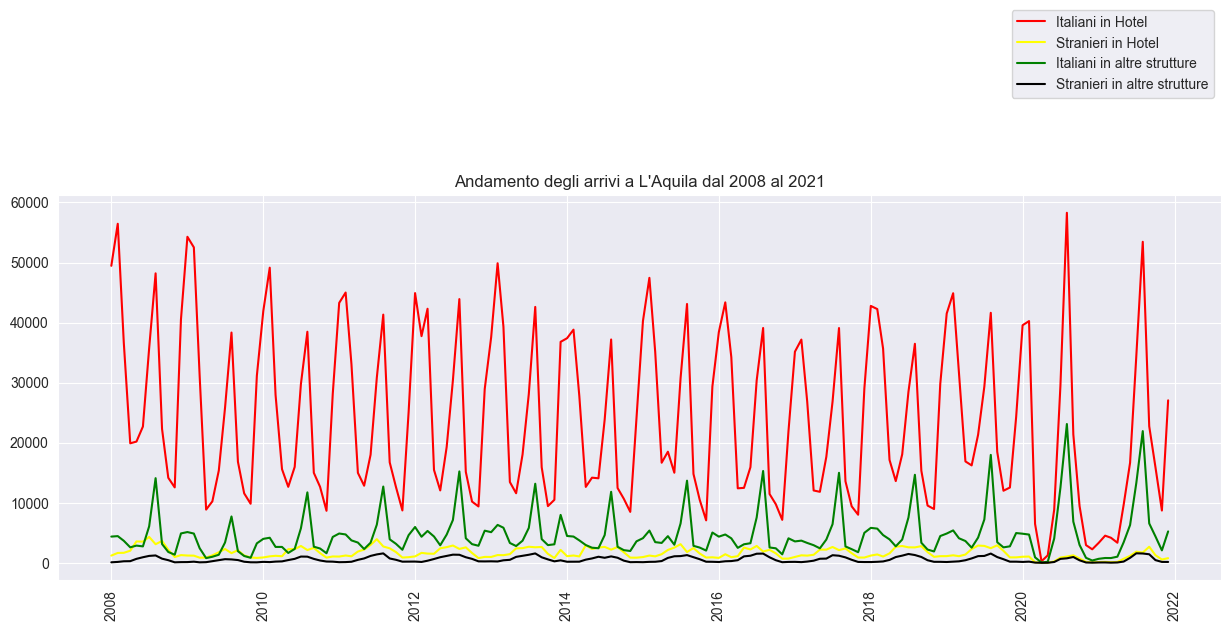

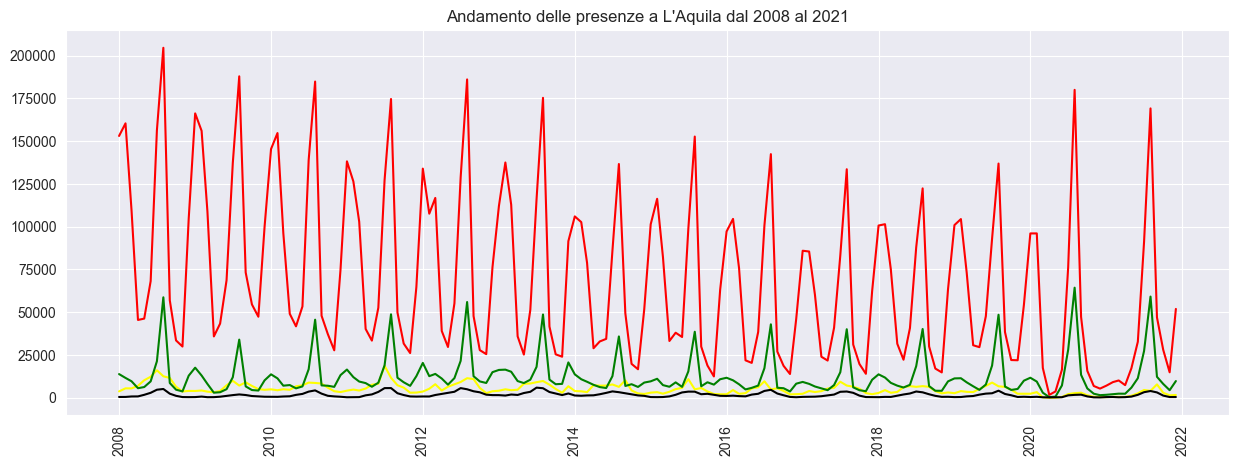

In [97]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
arrivals_aquila = Plot(mask_laq_hotel_ita.Date.size, mask_laq_hotel_ita['Arrivals'].size)
arrivals_aquila.tracciato(mask_laq_hotel_ita.Date, mask_laq_hotel_ita['Arrivals'], "Italiani in Hotel", "red")
arrivals_aquila.tracciato(mask_laq_hotel_ita.Date, mask_laq_hotel_ext['Arrivals'], "Stranieri in Hotel", "yellow")
arrivals_aquila.tracciato(mask_laq_hotel_ita.Date, mask_laq_nothotel_ita['Arrivals'], "Italiani in altre strutture", "green")
arrivals_aquila.tracciato(mask_laq_hotel_ita.Date, mask_laq_nothotel_ext['Arrivals'], "Stranieri in altre strutture", "black")
plt.title("Andamento degli arrivi a L'Aquila dal 2008 al 2021")
plt.legend(bbox_to_anchor=(1, 1.50))
plt.show()

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
attendance_aquila = Plot(mask_laq_hotel_ita.Date.size, mask_laq_hotel_ita['Attendance'].size)
attendance_aquila.tracciato(mask_laq_hotel_ita.Date, mask_laq_hotel_ita['Attendance'], "Italiani in Hotel", "red")
attendance_aquila.tracciato(mask_laq_hotel_ita.Date, mask_laq_hotel_ext['Attendance'], "Stranieri in Hotel", "yellow")
attendance_aquila.tracciato(mask_laq_hotel_ita.Date, mask_laq_nothotel_ita['Attendance'], "Italiani in altre strutture", "green")
attendance_aquila.tracciato(mask_laq_hotel_ita.Date, mask_laq_nothotel_ext['Attendance'], "Stranieri in altre strutture", "black")
plt.title("Andamento delle presenze a L'Aquila dal 2008 al 2021")
plt.show()

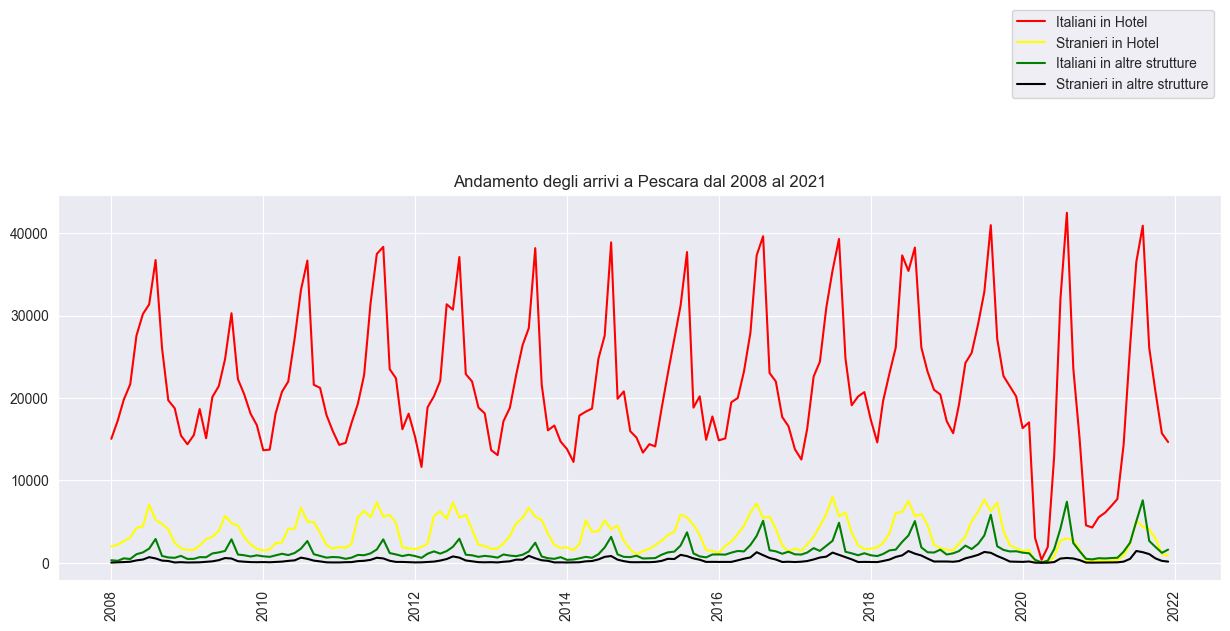

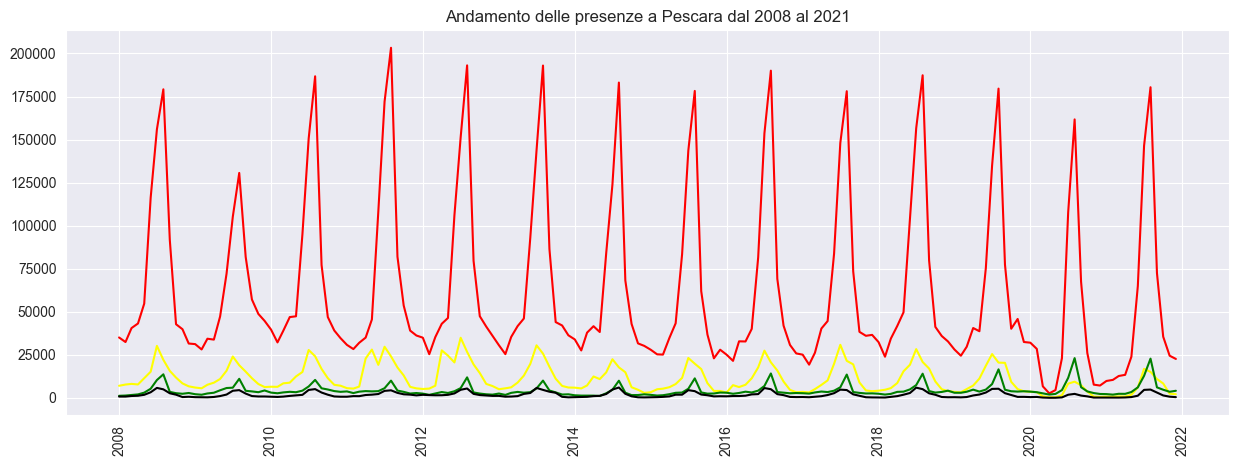

In [98]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
arrivals_pescara = Plot(mask_pes_hotel_ita.Date.size, mask_pes_hotel_ita['Arrivals'].size)
arrivals_pescara.tracciato(mask_pes_hotel_ita.Date, mask_pes_hotel_ita['Arrivals'], "Italiani in Hotel", "red")
arrivals_pescara.tracciato(mask_pes_hotel_ita.Date, mask_pes_hotel_ext['Arrivals'], "Stranieri in Hotel", "yellow")
arrivals_pescara.tracciato(mask_pes_hotel_ita.Date, mask_pes_nothotel_ita['Arrivals'], "Italiani in altre strutture", "green")
arrivals_pescara.tracciato(mask_pes_hotel_ita.Date, mask_pes_nothotel_ext['Arrivals'], "Stranieri in altre strutture", "black")
plt.title("Andamento degli arrivi a Pescara dal 2008 al 2021")
plt.legend(bbox_to_anchor=(1, 1.50))
plt.show()

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
attendance_pescara = Plot(mask_pes_hotel_ita.Date.size, mask_pes_hotel_ita['Attendance'].size)
attendance_pescara.tracciato(mask_pes_hotel_ita.Date, mask_pes_hotel_ita['Attendance'], "Italiani in Hotel", "red")
attendance_pescara.tracciato(mask_pes_hotel_ita.Date, mask_pes_hotel_ext['Attendance'], "Stranieri in Hotel", "yellow")
attendance_pescara.tracciato(mask_pes_hotel_ita.Date, mask_pes_nothotel_ita['Attendance'], "Italiani in altre strutture", "green")
attendance_pescara.tracciato(mask_pes_hotel_ita.Date, mask_pes_nothotel_ext['Attendance'], "Stranieri in altre strutture", "black")
plt.title("Andamento delle presenze a Pescara dal 2008 al 2021")
plt.show()

In [99]:
mask_abr_2008 = df[(df['Region'] == 'Abruzzo') & (df['Year'] == 2008)]
display(mask_abr_2008)

,Region,Infrastructure,ResidenceCountry,Date,Arrivals,Attendance,Year,Month
0,Abruzzo,HOTELLIKE,Italia,2008-01-01,88624,257703,2008,1
1,Abruzzo,HOTELLIKE,Paesi esteri,2008-01-01,5346,19124,2008,1
2,Abruzzo,OTHER,Italia,2008-01-01,5701,20039,2008,1
3,Abruzzo,OTHER,Paesi esteri,2008-01-01,202,2600,2008,1
20,Abruzzo,HOTELLIKE,Italia,2008-02-01,100147,269014,2008,2
21,Abruzzo,HOTELLIKE,Paesi esteri,2008-02-01,6621,24546,2008,2
22,Abruzzo,OTHER,Italia,2008-02-01,5870,18133,2008,2
23,Abruzzo,OTHER,Paesi esteri,2008-02-01,624,3735,2008,2
40,Abruzzo,HOTELLIKE,Italia,2008-03-01,84219,221282,2008,3
41,Abruzzo,HOTELLIKE,Paesi esteri,2008-03-01,7601,24421,2008,3


In [100]:
# Calcolo delle medie di arrivi mese per mese
mean_2008_01 = np.mean(mask_abr_2008[mask_abr_2008['Month'] == 1], axis=0)
mean_2008_02 = np.mean(mask_abr_2008[mask_abr_2008['Month'] == 2], axis=0)
mean_2008_03 = np.mean(mask_abr_2008[mask_abr_2008['Month'] == 3], axis=0)
mean_2008_04 = np.mean(mask_abr_2008[mask_abr_2008['Month'] == 4], axis=0)
mean_2008_05 = np.mean(mask_abr_2008[mask_abr_2008['Month'] == 5], axis=0)
mean_2008_06 = np.mean(mask_abr_2008[mask_abr_2008['Month'] == 6], axis=0)
mean_2008_07 = np.mean(mask_abr_2008[mask_abr_2008['Month'] == 7], axis=0)
mean_2008_08 = np.mean(mask_abr_2008[mask_abr_2008['Month'] == 8], axis=0)
mean_2008_09 = np.mean(mask_abr_2008[mask_abr_2008['Month'] == 9], axis=0)
mean_2008_10 = np.mean(mask_abr_2008[mask_abr_2008['Month'] == 10], axis=0)
mean_2008_11 = np.mean(mask_abr_2008[mask_abr_2008['Month'] == 11], axis=0)
mean_2008_12 = np.mean(mask_abr_2008[mask_abr_2008['Month'] == 12], axis=0)

mean_arr_2008_list = [mean_2008_01['Arrivals'], mean_2008_02['Arrivals'], mean_2008_03['Arrivals'], mean_2008_04['Arrivals'], mean_2008_05['Arrivals'], mean_2008_06['Arrivals'], mean_2008_07['Arrivals'], mean_2008_08['Arrivals'], mean_2008_09['Arrivals'], mean_2008_10['Arrivals'], mean_2008_11['Arrivals'], mean_2008_12['Arrivals']]

mean_att_2008_list = [mean_2008_01['Attendance'], mean_2008_02['Attendance'], mean_2008_03['Attendance'], mean_2008_04['Attendance'], mean_2008_05['Attendance'], mean_2008_06['Attendance'], mean_2008_07['Attendance'], mean_2008_08['Attendance'], mean_2008_09['Attendance'], mean_2008_10['Attendance'], mean_2008_11['Attendance'], mean_2008_12['Attendance']]

month = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

C:\Users\ICTS21-23.115\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\ICTS21-23.115\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


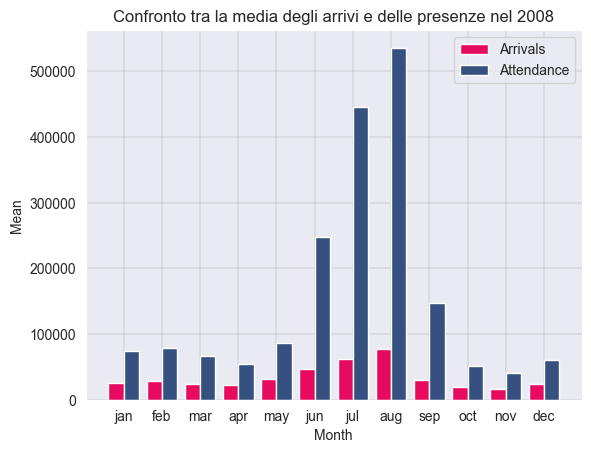

In [101]:
x_axis = np.arange(len(month))

# Creazione di un grafico a barre per visualizzare graficamente le percentuali di importazioni regione per regione nel 2015
plt.bar(x_axis - 0.2, mean_arr_2008_list, color="#e70b60", width=0.4)
plt.bar(x_axis + 0.2, mean_att_2008_list, color="#36517f", width=0.4)

plt.xticks(x_axis, month)
plt.xlabel("Month")
plt.ylabel("Mean")
plt.legend(['Arrivals', 'Attendance'], bbox_to_anchor=(1, 1))
plt.grid(True, linewidth=0.2, color='#808080', linestyle='-')
plt.title("Confronto tra la media degli arrivi e delle presenze nel 2008")
plt.show()